In [17]:
# Spatial Filter
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import numpy as np
from scipy import signal

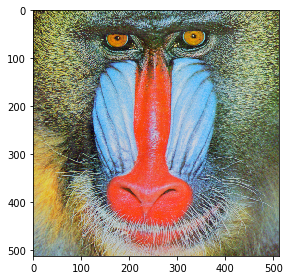

In [18]:
image_og = io.imread('baboon.png')
io.imshow(image_og)

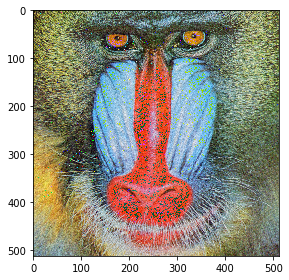

In [21]:
# Reduce noise by using Average filter
image = image_og
sh = image.shape

# Add Guaussian noise
mean = 0
sigma = 15
gn = np.random.normal(mean,sigma,(sh[0],sh[1]))
image_gn = image.copy()
image_gn[:,:,0]=image[:,:,0]+gn
image_gn[:,:,1]=image[:,:,1]+gn
image_gn[:,:,2]=image[:,:,2]+gn
io.imshow(image_gn)

Text(0.5, 1.0, 'Averaged Image')

<Figure size 432x288 with 0 Axes>

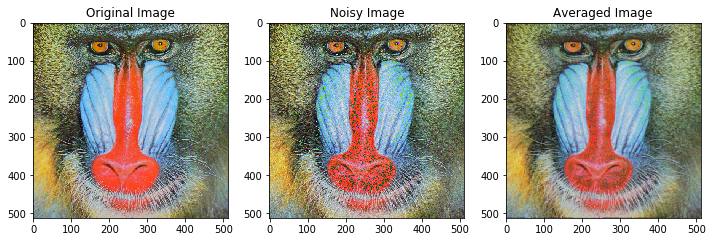

In [22]:
# Construct average filter
sz = 3
avg_filter = np.ones((sz,sz))/sz**2
image_avg = image_gn.copy()
image_avg[:,:,0] = signal.convolve2d(image_avg[:,:,0],avg_filter,mode='same')
image_avg[:,:,1] = signal.convolve2d(image_avg[:,:,1],avg_filter,mode='same')
image_avg[:,:,2] = signal.convolve2d(image_avg[:,:,2],avg_filter,mode='same')

plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
io.imshow(image)
plt.title('Original Image')

plt.subplot(1,3,2)
io.imshow(image_gn)
plt.title('Noisy Image')

plt.subplot(1,3,3)
io.imshow(image_avg)
plt.title('Averaged Image')

In [28]:
# Application of Median Filter to remove salt and pepper noise

from random import randint
from random import seed

In [29]:
image = rgb2gray(image)
#io.imshow(image)
sh = image.shape

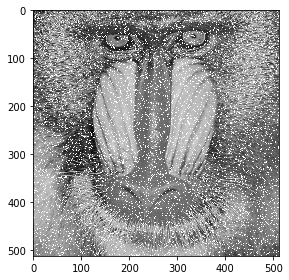

In [44]:
image_sp = image.copy()

# Portion of the image which is corrupted by noise, a
a = 0.1
sp_numb = int(sh[0]*sh[1]*a)

sp_val = 1

seed(1)

for i in range(0,sp_numb):
    temp1 = randint(0,sh[0]-1)
    temp2 = randint(0,sh[1]-1)
    image_sp[temp1][temp2] = sp_val
    
io.imshow(image_sp)

In [45]:
image_spfilt = image_sp.copy()
sz = 3

# Center of mask
cent = int((sz-1)/2)

# Location of median in sorted array
med = int(((sz**2)-1)/2)

for row in range(0,sh[0]-sz):
    for col in range(0,sh[1]-sz):
        temp1 = image_sp[row:row+sz,col:col+sz]
        temp2=np.reshape(temp1,(1,sz*sz))
        temp3 = np.sort(temp2)
        image_spfilt[row+cent,col+cent] = temp3[0][med]

Text(0.5, 1.0, 'Image after Median Filter')

<Figure size 432x288 with 0 Axes>

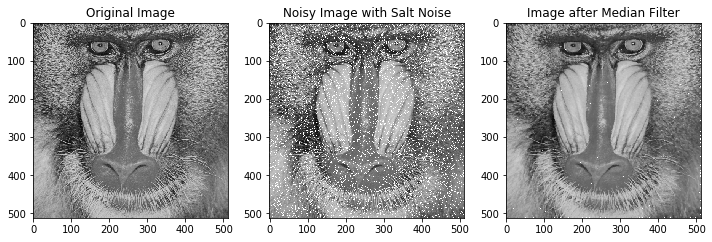

In [46]:
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
io.imshow(image)
plt.title('Original Image')

plt.subplot(1,3,2)
io.imshow(image_sp)
plt.title('Noisy Image with Salt Noise')

plt.subplot(1,3,3)
io.imshow(image_spfilt)
plt.title('Image after Median Filter')